In [1]:
# Import necessary modules
import geopandas as gpd

In [2]:
# Set filepath
fp = "Comuni_correnti_poligonali.shp"

# Read file using gpd.read_file()
data = gpd.read_file(fp)

<Axes: >

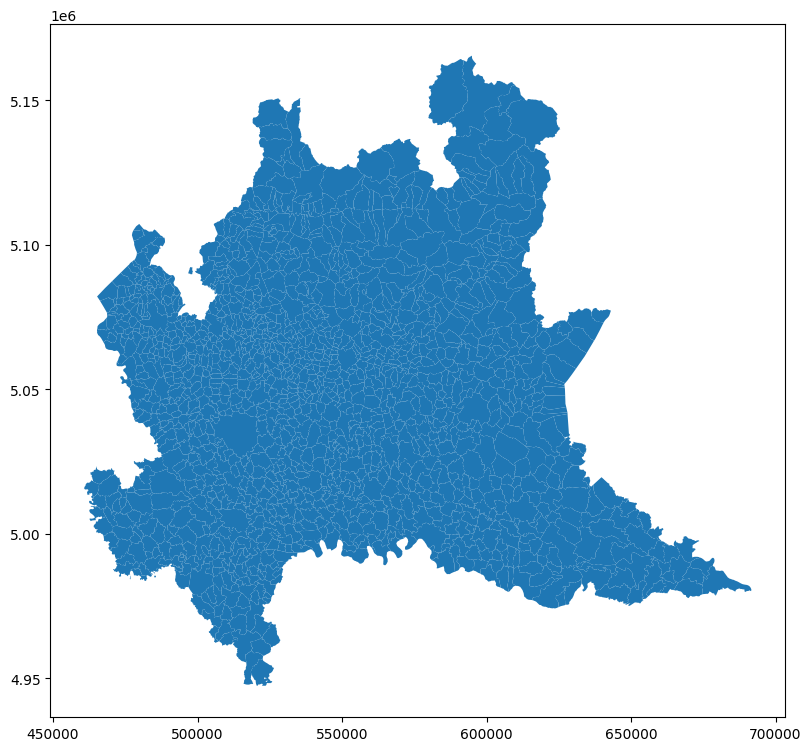

In [3]:
data_bg = data#[data['SIG_PRO']=='BG']
data_bg.plot(figsize=(16,9))

In [4]:
import folium
from folium import plugins

m = folium.Map([45.8, 9.9], zoom_start=9, tiles="cartodbpositron")
plugins.Geocoder().add_to(m)
folium.GeoJson(data_bg.head(10), tooltip=folium.GeoJsonTooltip(fields= ["NOME_COM"], labels=True)).add_to(m)
plugins.Draw(export=True).add_to(m)

m

In [6]:
data_bg_by_area = data_bg.sort_values(by=['SHAPE_AREA'], ascending=False).reset_index(drop=True)
data_bg_by_area

,OBJECTID,CLASSREF,BELFIORE,COD_ISTATN,NOME_COM,COD_PRO,NOME_PRO,SIG_PRO,COD_CMO,NOME_CMO,...,ANNO,ISTAT,LEGGE_ISTI,ATS_COD,ATS_DEC,CMETR_COD,CMETR_DEC,SHAPE_AREA,SHAPE_LEN,geometry
0,769,08e84b10-55d4-4ea3-a832-b7379d0de9be,L557,03014071,VALDIDENTRO,14,SONDRIO,SO,ZO17,ALTA VALTELLINA,...,2023,14071,None,030323,ATS DELLA MONTAGNA,None,None,2.442782e+08,113550.801984,"POLYGON ((586846.613 5142597.955, 586871.982 5..."
1,848,3e6bd3b2-94db-439d-8b2c-4ff51a0aba3a,L576,03014073,VALFURVA,14,SONDRIO,SO,ZO17,ALTA VALTELLINA,...,2023,14073,None,030323,ATS DELLA MONTAGNA,None,None,2.151708e+08,70082.593191,"POLYGON ((616632.364 5133396.057, 616632.463 5..."
2,197,932a4cc6-8670-41b8-836f-27552c5afa50,E621,03014037,LIVIGNO,14,SONDRIO,SO,ZO17,ALTA VALTELLINA,...,2015,14037,None,030323,ATS DELLA MONTAGNA,None,None,2.106679e+08,74617.668578,"POLYGON ((586846.613 5142597.955, 586835.411 5..."
3,266,ead1f83c-5530-4e67-8d9f-1779685fd940,F205,03015146,MILANO,15,MILANO,MI,None,None,...,2024,15146,None,030321,ATS DELLA CITTA' METROPOLITANA DI MILANO,001,CITTA' METROPOLITANA DI MILANO,1.817861e+08,106435.251811,"POLYGON ((509685.211 5041035.697, 509686.836 5..."
4,803,447f5cfa-0a2f-4eca-8c51-b3dcedb3384f,E200,03014033,GROSIO,14,SONDRIO,SO,ZO18,VALTELLINA DI TIRANO,...,2023,14033,None,030323,ATS DELLA MONTAGNA,None,None,1.268536e+08,75902.190507,"POLYGON ((598485.962 5139430.087, 598490.086 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,920,a63ecdc6-c2e5-4c14-8924-fff03dfb8d51,D551,03012069,FERRERA DI VARESE,12,VARESE,VA,ZO23,VALLI DEL VERBANO,...,2019,12069,None,030322,ATS DELL'INSUBRIA,None,None,1.489767e+06,6255.587535,"POLYGON ((482811.769 5085989.734, 482812.971 5..."
1498,136,6e0962b5-89c9-48f9-9407-5ead0caee8e5,D185,03012057,CROSIO DELLA VALLE,12,VARESE,VA,None,None,...,2016,12057,None,030322,ATS DELL'INSUBRIA,None,None,1.472933e+06,6294.019165,"POLYGON ((481079.727 5067903.724, 481085.774 5..."
1499,616,001674da-8afa-4620-bfa9-517678513e1f,F017,03013144,MASLIANICO,13,COMO,CO,None,None,...,2023,13144,None,030322,ATS DELL'INSUBRIA,None,None,1.310439e+06,5304.272673,"POLYGON ((504369.019 5076089.958, 504338.162 5..."
1500,987,f2e28d44-32db-4c44-9e82-550387f819e0,I813,03016251,SOLZA,16,BERGAMO,BG,None,None,...,2017,16251,None,030325,ATS DI BERGAMO,None,None,1.228835e+06,5922.954401,"POLYGON ((539047.62 5058424.463, 539005.945 50..."


In [7]:
from branca.element import CssLink, Figure, JavascriptLink, MacroElement
from jinja2 import Template

class JsButton(MacroElement):
    """
    Button that executes a javascript function.
    Parameters
    ----------
    title : str
         title of the button, may contain html like 
    function : str
         function to execute, should have format `function(btn, map) { ... }`
          
    See https://github.com/prinsherbert/folium-jsbutton.
    """
    _template = Template("""
        {% macro script(this, kwargs) %}
        // Get list of default polyogons (not the Drawn ones)
        var polygons = {{ this.map_name }}._layers;
        var polygonsArray = [];
        for (var i in polygons) {
            if (polygons[i].hasOwnProperty('feature')) {
                polygonsArray.push(polygons[i].toGeoJSON());
            }
        };
        console.log(polygonsArray);
        L.easyButton(
            '<span>{{ this.title }}</span>',
            {{ this.function }}
        ).addTo({{ this.map_name }});
        {% endmacro %}
        """)

    def __init__(self, title='', function="""
        function(btn, map){
            alert('no function defined yet.');
        }
    """):
        super(JsButton, self).__init__()
        self.title = title
        self.function = function

    def add_to(self, m):
        self.map_name = m.get_name()
        super(JsButton, self).add_to(m)

    def render(self, **kwargs):
        super(JsButton, self).render()

        figure = self.get_root()
        assert isinstance(figure, Figure), (
            'You cannot render this Element if it is not in a Figure.')

        figure.header.add_child(
            JavascriptLink('https://cdn.jsdelivr.net/npm/leaflet-easybutton@2/src/easy-button.js'),  # noqa
            name='Control.EasyButton.js'
        )

        figure.header.add_child(
            CssLink('https://cdn.jsdelivr.net/npm/leaflet-easybutton@2/src/easy-button.css'),  # noqa
            name='Control.EasyButton.css'
        )

        figure.header.add_child(
            CssLink('https://use.fontawesome.com/releases/v5.3.1/css/all.css'),  # noqa
            name='Control.FontAwesome.css'
        )

        figure.header.add_child(
                    JavascriptLink('https://cdn.jsdelivr.net/npm/@turf/turf@6/turf.min.js'),
                    name='Turf.js'
                )

        # Add the shp-write library
        figure.header.add_child(
            JavascriptLink('https://unpkg.com/@mapbox/shp-write@latest/shpwrite.js'),
            name="ShpWrite.js"
        )


import folium 
from folium import plugins


m = folium.Map([46.2, 9.9], zoom_start=9, tiles="cartodbpositron")
plugins.Geocoder().add_to(m)
plugins.MiniMap().add_to(m)
plugins.Draw(export=False,
             draw_options={'polyline': False, 'rectangle': False,'circle':False, 'circlemarker':False},
             edit_options={'poly': {'allowIntersection': True}}).add_to(m)

citygeo = folium.GeoJson(data_bg_by_area.head(10).reset_index(drop=False), 
                         tooltip=folium.GeoJsonTooltip(fields= ["NOME_COM", "NOME_PRO", "index"], 
                                                       labels=True)).add_to(m)

citysearch = plugins.Search(
    layer=citygeo,
    geom_type="Polygon",
    placeholder="Comune",
    collapsed=True,
    search_label="NOME_COM",
).add_to(m)


JsButton(
    title='<i class="fas fa-calculator" href="#" id="export_intersection" ></i>', function="""
    function(btn, map) {
    
        var drawnPolygons = map._layers;

        for (var i in drawnPolygons) {

            var intersectionArray = [];
            
            if (drawnPolygons[i].hasOwnProperty('editing') &&
               !drawnPolygons[i].hasOwnProperty('defaultOptions')) {

                // Drawn polygon
                var drawnItem = drawnPolygons[i].toGeoJSON()
                //console.log(i, "drawn: ", drawnItem)

               for(var j in polygonsArray) {
                   // From "geopandas"
                   var polygon = polygonsArray[j]
                   //console.log(j, "geopandas", polygon)
                   
                   // Subtruct both polygons
                   var intersection = turf.intersect(drawnItem, polygon)

                   // Print only if intersection is not null
                   if(intersection!=null){
                       intersectionArray.push(intersection)
                       console.log("intersection: ", intersection)
                   }
               }
                
            }
            if(intersectionArray.length > 0){
               var intersectionCollection = turf.featureCollection(intersectionArray)
               console.log("intersectionCollection: ", intersectionCollection)
               
               // Convert GeoJSON to Shapefile and trigger the download
               var convertedData = 'text/json;charset=utf-8,' + encodeURIComponent(JSON.stringify(intersectionCollection));
               document.getElementById('export_intersection').setAttribute('href', 'data:' + convertedData);
               document.getElementById('export_intersection').setAttribute('download', 'download.geojson');

               var file = "fede" + '.geojson';
               saveAs(new File([JSON.stringify(intersectionCollection)], file, {
                 type: "text/plain;charset=utf-8"
               }), file);

            }
               
        }
    }
    """
).add_to(m)

m

<Axes: xlabel='NOME_COM'>

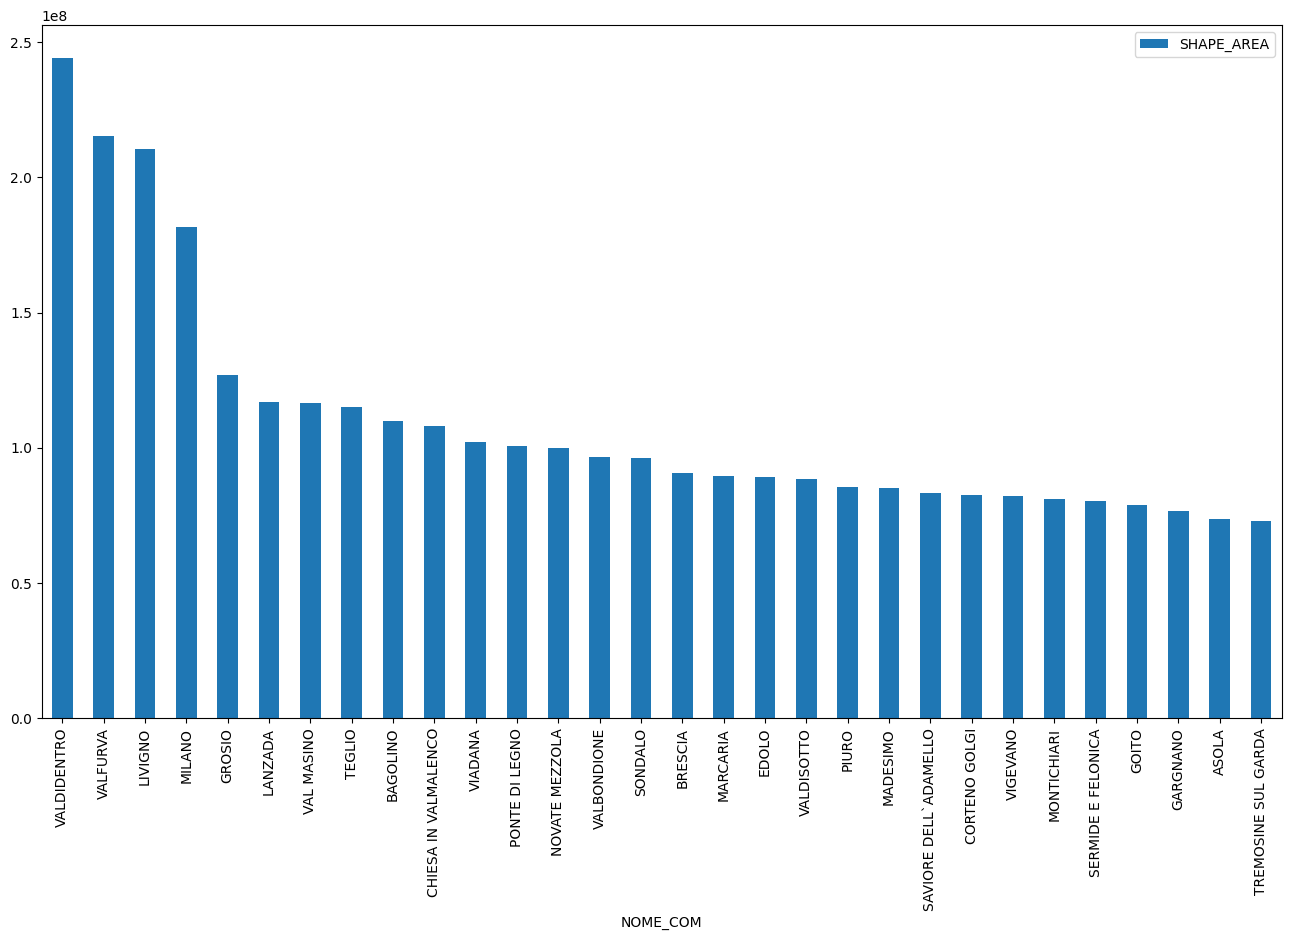

In [43]:
data_bg_by_area.head(30).plot(x='NOME_COM', y='SHAPE_AREA', kind='bar', figsize=(16,9))

In [70]:
# Read intersection file
df_intersections = gpd.read_file("fede_1.geojson")
df_intersections

import folium
from folium import plugins

m = folium.Map([45.8, 9.9], zoom_start=9, tiles="cartodbpositron")
plugins.Geocoder().add_to(m)
folium.GeoJson(df_intersections).add_to(m)
plugins.Draw(export=True).add_to(m)

m